# 🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce

Unsupervised Machine Learning – Clustering
Collaborative Filtering – Recommendation System


**Step 1:Dataset Collection and understanding**

In [1]:
# Libraries
import pandas as pd
import numpy as np


In [3]:
 # Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Files/online_retail.csv')

In [5]:
df.shape

(541909, 8)

In [4]:
# Initial Exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
# View rows where InvoiceNo starts with 'C'
cancelled_orders = df[df['InvoiceNo'].astype(str).str.startswith('C')]

cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom


In [22]:
# View rows with Quantity <= 0 or UnitPrice <= 0
invalid_transactions = df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]

invalid_transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2022-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2022-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2022-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom


# Data Preprocessing:

In [8]:
# Remove rows with missing CustomerID
df = df[~df['CustomerID'].isnull()]

In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [14]:
#  Exclude cancelled invoices (starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [16]:
df.shape

(397924, 8)

In [17]:
# View rows where InvoiceNo starts with 'C'
cancelled_orders2 = df[df['InvoiceNo'].astype(str).str.startswith('C')]

cancelled_orders2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
# Remove rows with Quantity ≤ 0 or UnitPrice ≤ 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [24]:
# View rows with Quantity <= 0 or UnitPrice <= 0
invalid_transactions2 = df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]

invalid_transactions2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [34]:
# convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
# Create a new column: TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,2022-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,2022-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,2022-12,20.34


# EDA (Visuals and Stats)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Set styles
sns.set(style='whitegrid')

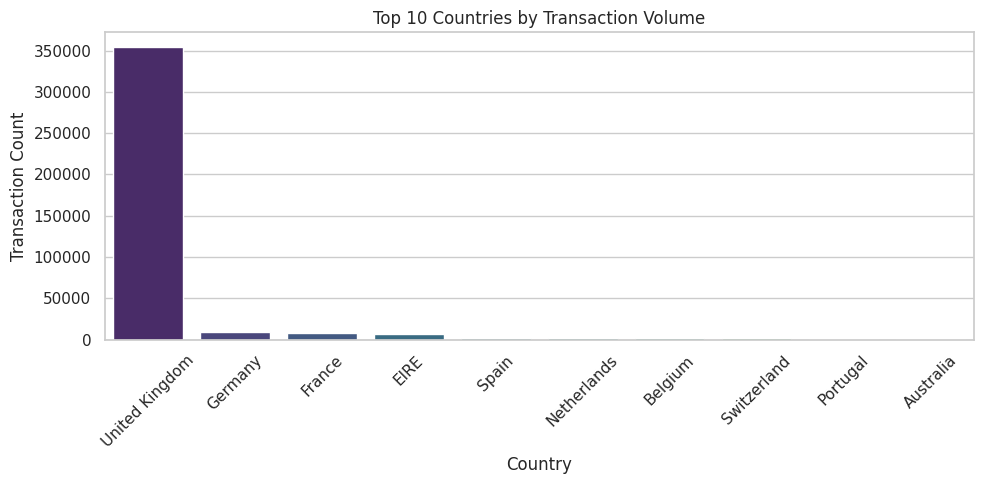

In [35]:
# 1.Transaction volume by country (Top 10)
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', hue=top_countries.index)
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.title('Top 10 Countries by Transaction Volume')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-36-4093117924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


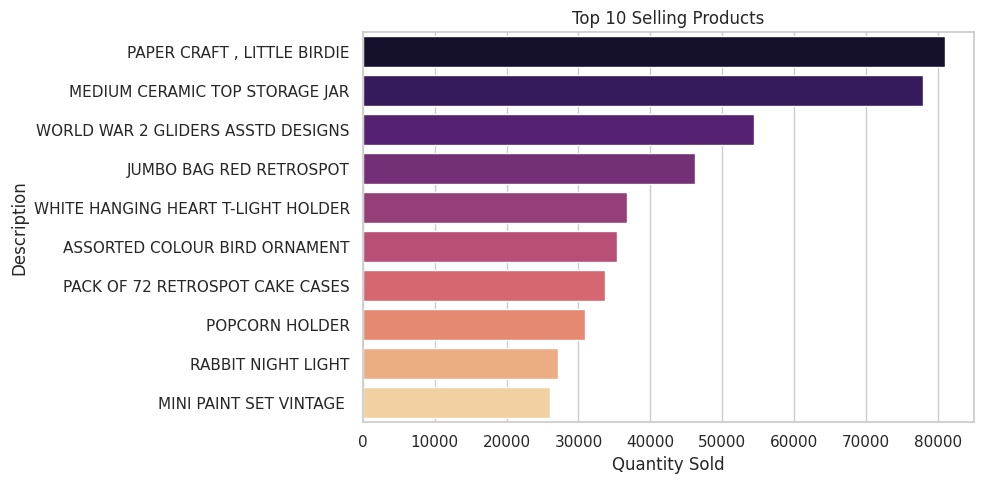

In [36]:
# 2. Top-selling products (by quantity)
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.tight_layout()
plt.show()

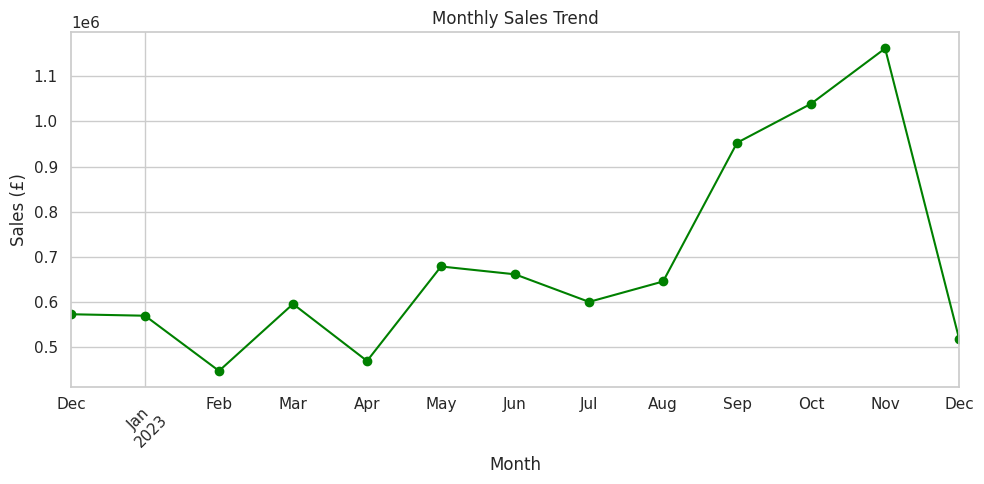

In [42]:
# 3. Monthly purchase trends
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 5), title="Monthly Sales Trend", color='green')
plt.xlabel("Month")
plt.ylabel("Sales (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

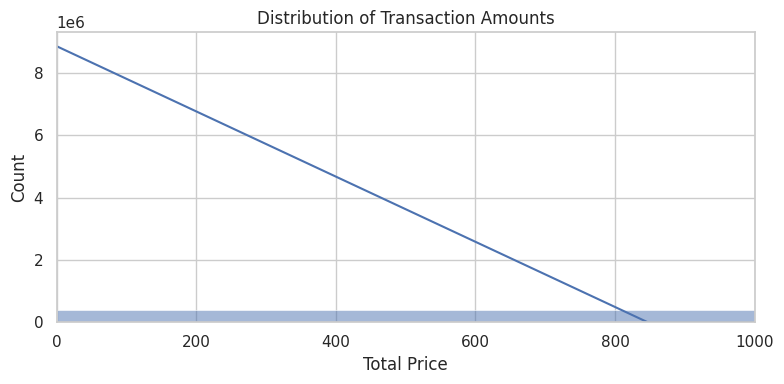

In [43]:
# 4.  Transaction-level monetary distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalPrice'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Total Price")
plt.tight_layout()
plt.show()

/tmp/ipython-input-45-1884611732.py:13: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


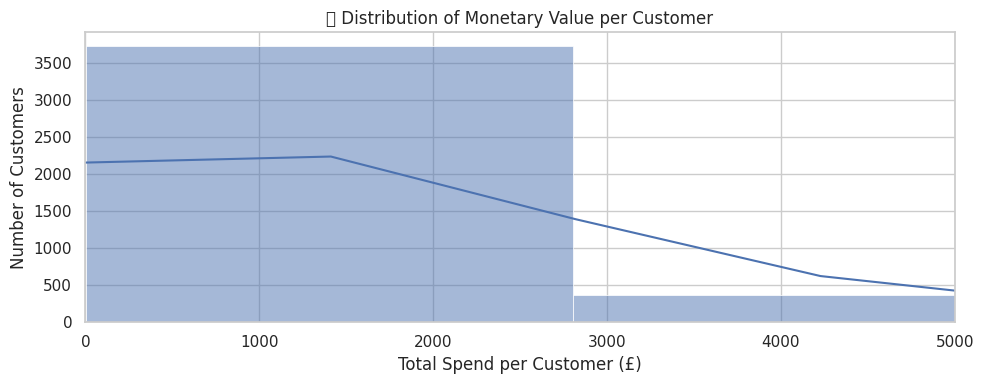

In [45]:
# Monetary Distribution per Customer

# Group by customer and sum total spending
customer_monetary = df.groupby('CustomerID')['TotalPrice'].sum()

# Plot distribution per customer
plt.figure(figsize=(10, 4))
sns.histplot(customer_monetary, bins=100, kde=True)
plt.xlim(0, 5000)  # Adjust this based on your customer spend range
plt.title("💸 Distribution of Monetary Value per Customer")
plt.xlabel("Total Spend per Customer (£)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# RFM Feature Engineering + Clustering (KMeans)

In [80]:
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [47]:
# Latest purchase date
latest_date = df['InvoiceDate'].max()


In [48]:
#  RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [50]:
# 🧼 Filter low-spenders if needed
rfm = rfm[rfm['Monetary'] > 0]

In [51]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [52]:
# Normalize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

/tmp/ipython-input-53-3560703405.py:6: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


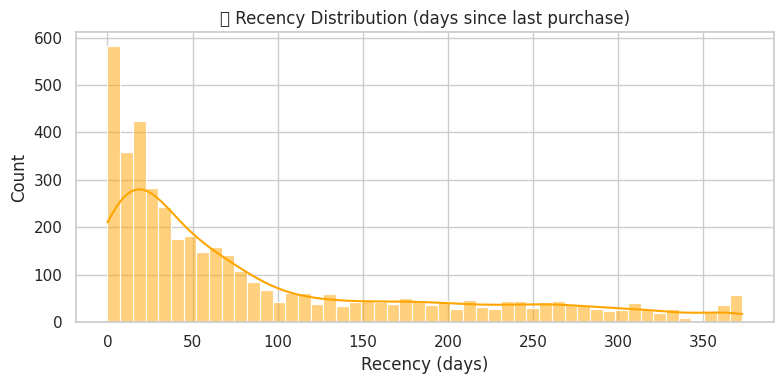

In [53]:
# Recency Distribution
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Recency'], bins=50, kde=True, color='orange')
plt.title("⏳ Recency Distribution (days since last purchase)")
plt.xlabel("Recency (days)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-54-2395524763.py:6: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


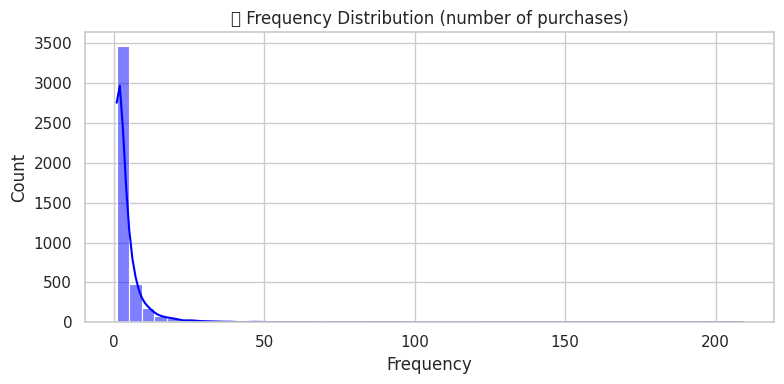

In [54]:
#  Frequency Distribution
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Frequency'], bins=50, kde=True, color='blue')
plt.title("🔁 Frequency Distribution (number of purchases)")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

/tmp/ipython-input-56-589568853.py:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


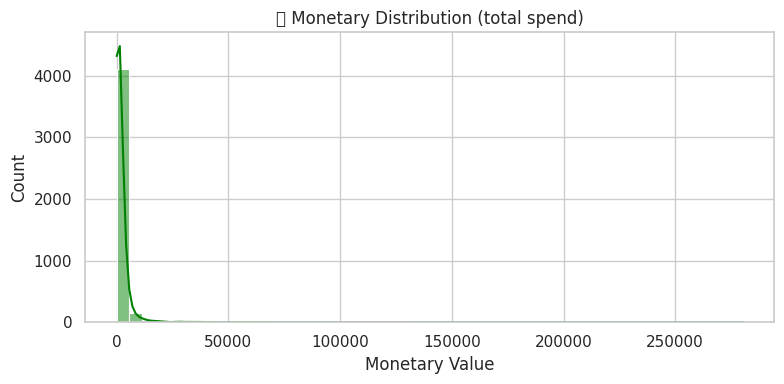

In [56]:
# Monetary Distribution
plt.figure(figsize=(8, 4))
sns.histplot(rfm['Monetary'], bins=50, kde=True, color='green')
plt.title("💰 Monetary Distribution (total spend)")
plt.xlabel("Monetary Value")
plt.tight_layout()
plt.show()

In [71]:
inertias = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)

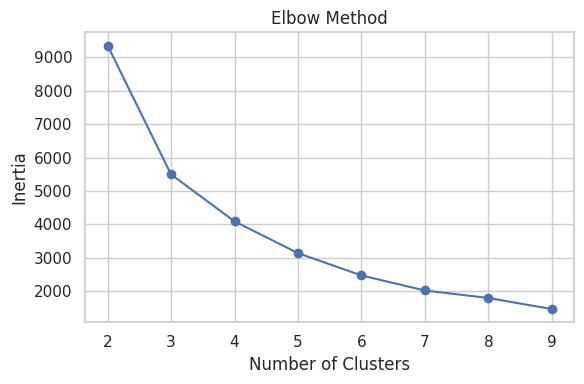

In [72]:
# Elbow Plot
plt.figure(figsize=(6, 4))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

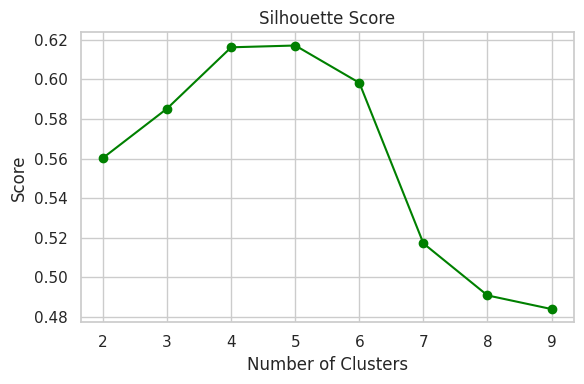

In [73]:
# Silhouette Plot
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [74]:
labels = kmeans.labels_
score = silhouette_score(rfm_scaled, labels)
print(f"Silhouette Score for KMeans clustering: {score:.4f}")

Silhouette Score for KMeans clustering: 0.4840


In [78]:
# Use best k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [79]:
# Mean RFM values per cluster
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

def assign_label(row):
    if row['Recency'] < 30 and row['Frequency'] > 10 and row['Monetary'] > 1000:
        return 'High-Value'
    elif row['Frequency'] >= 5 and row['Monetary'] >= 300:
        return 'Regular'
    elif row['Frequency'] <= 2 and row['Monetary'] <= 200 and row['Recency'] > 90:
        return 'Occasional'
    elif row['Recency'] > 120 and row['Frequency'] < 3 and row['Monetary'] < 200:
        return 'At-Risk'
    else:
        return 'Others'

cluster_profiles['Segment'] = cluster_profiles.apply(assign_label, axis=1)
print(cluster_profiles)


            Recency  Frequency       Monetary     Segment
Cluster                                                  
0         42.702685   3.682711    1359.049284      Others
1        247.075914   1.552015     480.617480      Others
2          6.384615  82.538462  127338.313846  High-Value
3         14.500000  22.333333   12709.090490  High-Value


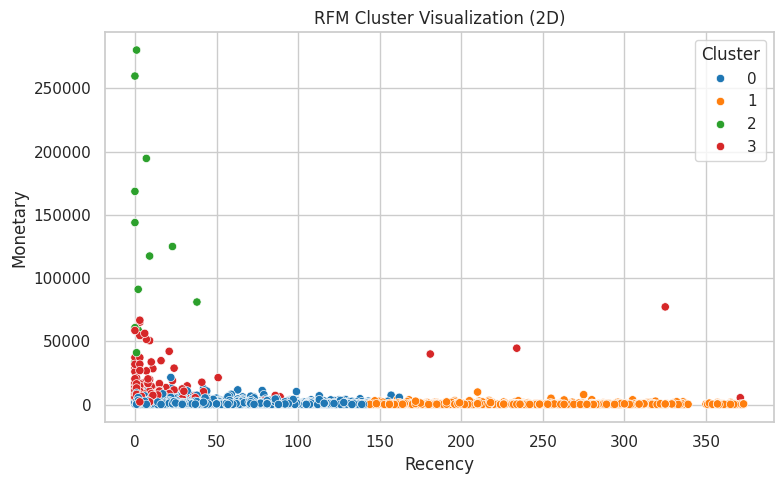

In [81]:

# 2D Plot (Recency vs Monetary)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title("RFM Cluster Visualization (2D)")
plt.tight_layout()
plt.show()

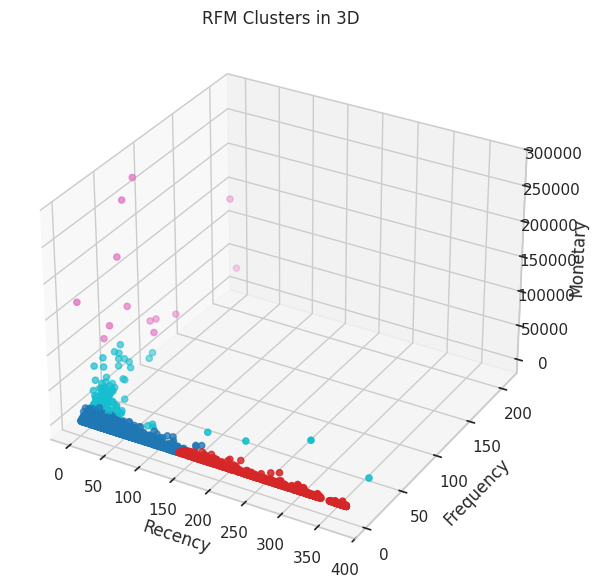

In [82]:
# 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'],
                     c=rfm['Cluster'], cmap='tab10')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("RFM Clusters in 3D")
plt.tight_layout()
plt.show()


In [83]:
import pickle

# Save KMeans model
with open("best_rfm_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Save Scaler too (for consistent future predictions)
with open("rfm_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
